In [1]:
# Upgrade TensorFlow and install the latest version of Keras CV
! pip install tensorflow --upgrade -qq
! pip install keras_cv --upgrade -qq

     |████████████████████████████████| 511.7 MB 5.5 kB/s 
     |████████████████████████████████| 5.8 MB 52.2 MB/s 
     |████████████████████████████████| 438 kB 67.9 MB/s 
     |████████████████████████████████| 1.6 MB 68.8 MB/s 
     |████████████████████████████████| 227 kB 21.3 MB/s 


In [2]:
# Import the necessary packages
import keras_cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from typing import Optional

import matplotlib.pyplot as plt

In [3]:
# Checking the versions of the packages
print(f"TensorFlow version: {tf.__version__}")
print(f"TensorFlow version: {keras_cv.__version__}")

TensorFlow version: 2.9.1
TensorFlow version: 0.2.10


# Get the image

In [4]:
image_name = "dog.png"
image_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"

In [5]:
def load_image(image_path: str):
	image = tf.io.read_file(image_path)
	image = tf.image.decode_image(image, channels=3)
	return image

# Get the image from the url and load the image as a `tf.tensor`
image_path = keras.utils.get_file(
	image_name,
	image_url,
)
image = load_image(image_path)

# Adding batch dimension to the image
image = image[tf.newaxis, ...]

83281/83281 [==============================] - 0s 0us/step


In [21]:
# Plot the image
def display_image(image: tf.Tensor, gray: Optional[bool] = False):
  if gray:
    plt.imshow(image[..., 0], cmap="gray")
  else:
    plt.imshow(image)
  plt.axis("off")
  plt.show()

# Augmentation Layers

[Reference](https://github.com/facebookresearch/msn/blob/4388dc1eadbe3042b85d3296d41b9b207656e043/src/data_manager.py#L85-L104)

In [7]:
rand_size = (224, 224)
focal_size = (96, 96)

rand_crop_scale=(0.3, 1.0)
focal_crop_scale=(0.05, 0.3)

## RandomResizedCrop

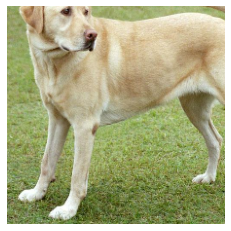

In [8]:
aug_image = keras_cv.layers.RandomResizedCrop(
  target_size=rand_size,
  crop_area_factor=rand_crop_scale,
  # the aspect ratio is taken as the default in `transforms.RandomResizedCrop`
  aspect_ratio_factor=(0.75, 1.3),
)(image)

display_image(aug_image[0].numpy().astype("int32"))

## Random Horizontal Flip

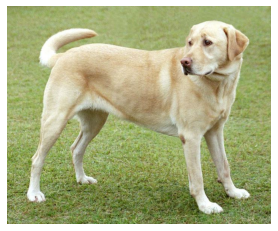

In [9]:
aug_image = keras_cv.layers.RandomFlip(
    mode="horizontal"
)(image)

display_image(aug_image[0].numpy().astype("int32"))

## Color Distortion

- `transforms.ColorJitter` is similar to `keras_cv.layers.RandomColorJitter` 

In [10]:
class Identity(keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
  def call(self, inputs):
    return inputs

def random_apply(layer: layers.Layer, probability_map: Optional[float] = 0.5):
    if tf.random.uniform([]) < probability_map:
      return layer
    else:
      return Identity()

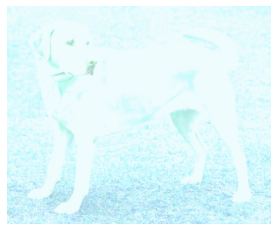

In [12]:
# Color Jitter
s = 1.0
color_jitter = keras_cv.layers.RandomColorJitter(
  value_range=(0, 255),
  brightness_factor=0.8*s,
  contrast_factor=0.8*s,
  saturation_factor=0.8*s,
  hue_factor=0.8*s,
)
aug_image = random_apply(
  layer=color_jitter,
  probability_map=0.8
)(image)

display_image(aug_image[0].numpy().astype("int32"))

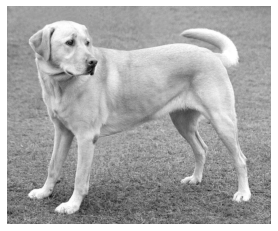

In [22]:
# Random GrayScale
gray_scale = keras_cv.layers.Grayscale()
aug_image = random_apply(
    layer=gray_scale,
    probability_map=0.2,
)(image)

display_image(aug_image[0].numpy().astype("int32"), gray=aug_image.shape[-1]==1)

# Gaussian Blur

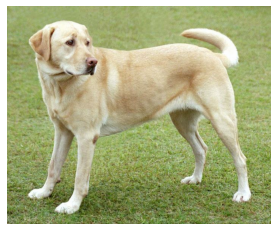

In [27]:
# This does not align with the original implementation
aug_image = keras_cv.layers.RandomGaussianBlur(
    kernel_size=(1, 2),
    factor=(0.5, 0.5),
)(image)

display_image(aug_image[0].numpy().astype("int32"))